## Notebook to simplify bpow layer - For Story map
This notebook shows the simplification process followed to simplify the benthic layer to be able to show it on the ESRI story map

In [1]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
# Import layer
bpow = gpd.read_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/bpow_p8s5_abyssal_corr.shp')
len(bpow)

100

In [7]:
# Check number of valid geometries
sum(bpow.is_valid) 

27

In [8]:
# Repair geometries, in case some are invalid after simplification, and check how many are valid
bpow['geometry'] = bpow['geometry'].buffer(0) # this is to repair geometries
sum(bpow.is_valid) # now all are valid

100

In [9]:
# Save corrected layer
bpow.to_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/corrected/bpow_p8s5_abyssal_corrected.shp', driver='ESRI Shapefile')

In [13]:
bpow = gpd.read_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/corrected/bpow_p8s5_abyssal_corrected.shp')

### Simplification

In [32]:
# Simplify layer 
!mapshaper-xl 16gb -i /Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/corrected/bpow_p8s5_abyssal_corrected.shp snap \
    -simplify 10% weighting=0.3 planar keep-shapes \
    -filter-islands min-vertices=3 min-area=10000m2 remove-empty \
    -filter-slivers min-area=10000m2 remove-empty \
    -clean rewind \
    -o /Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/bpow_p8s5_abyssal_simplified.shapefile format=shapefile 

Allocating 16 GB of heap memory
[i] Snapped 46798 points
[simplify] Repaired 399 intersections; 2,400 intersections could not be repaired
[filter-islands] Removed 5,605 islands
[filter-slivers] Removed 65,287 slivers using 0.01+ sqkm variable threshold
[clean] Removed 107 / 126 slivers using 7.6+ sqkm variable threshold
[clean] Retained 100 of 100 features
[o] Wrote /Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/bpow_p8s5_abyssal_simplified.shp
[o] Wrote /Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/bpow_p8s5_abyssal_simplified.shx
[o] Wrote /Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/bpow_p8s5_abyssal_simplified.dbf
[o] Wrote /Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/bpow_p8s5_abyssal_simplified.prj


In [33]:
# Open simplified layer
bpow2 = gpd.read_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/bpow_p8s5_abyssal_simplified.shp')

In [18]:
len(bpow2)

100

In [34]:
sum(bpow2.is_valid) 

91

In [35]:
# Repair geometries, in case some are invalid after simplification, and check how many are valid
bpow2['geometry'] = bpow2['geometry'].buffer(0) # this is to repair geometries
sum(bpow2.is_valid) # now all are valid

100

In [21]:
bpow2.head()

,type,type_id,prov_n,prov_id,source,ID,geometry
0,abyssal,abyssal-1,Arctic,1,"Watling et al., (2013)",1,"MULTIPOLYGON (((180.008 88.538, 180.008 88.504..."
1,abyssal,abyssal-10,South Pacific,10,"Watling et al., (2013)",2,"MULTIPOLYGON (((180.000 -11.146, 180.000 -11.3..."
2,abyssal,abyssal-11,Central Pacific,11,"Watling et al., (2013)",3,"MULTIPOLYGON (((174.900 -2.304, 174.725 -2.279..."
3,abyssal,abyssal-12,North Central Pacific,12,"Watling et al., (2013)",4,"MULTIPOLYGON (((137.067 33.171, 137.100 33.188..."
4,abyssal,abyssal-13,North Pacific,13,"Watling et al., (2013)",5,"MULTIPOLYGON (((141.733 31.546, 141.742 31.538..."


In [36]:
## Divide layer by type
abyssal = bpow2[bpow2['type']=='abyssal']
abyssal.to_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/abyssal_simplified.shp', driver = 'ESRI Shapefile')
bathyal = bpow2[bpow2['type']=='bathyal']
bathyal.to_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/bathyal_simplified.shp', driver = 'ESRI Shapefile')
coastal = bpow2[bpow2['type']=='coastal']
coastal.to_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/coastal_simplified.shp', driver = 'ESRI Shapefile')
hadal = bpow2[bpow2['type']=='hadal']
hadal.to_file('/Users/sofia/Documents/HE_Data/Story_Map/BenthicLayer/simplified/hadal_simplified.shp', driver = 'ESRI Shapefile')

<AxesSubplot:>

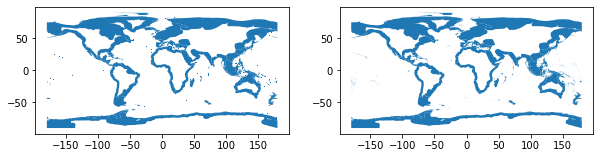

In [37]:
# Check if new geometries in corrected database are the same as the simplified
n= '5'
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
bpow[bpow['type']=='coastal'].geometry.plot(ax = ax1) 
coastal.geometry.plot(ax = ax2)